In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
np.random.seed(101) 
tf.set_random_seed(101) 



In [3]:
# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 

# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 
y+=1
n = len(x) # Number of data points 



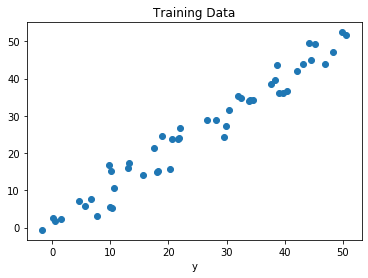

In [4]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 



In [11]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 

W = tf.Variable(2.4, name = "W") 
b = tf.Variable(4.3, name = "b") 

In [12]:
learning_rate = 0.01
training_epochs = 2000

In [13]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 

# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

# Global Variables Initializer 
init = tf.global_variables_initializer() 

In [14]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
    
    # Initializing the Variables 
    sess.run(init) 

    # Iterating through all the epochs 
    for epoch in range(training_epochs): 

        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 

        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 

    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 



Epoch 50 : cost = 7.422756 W = 0.96187806 b = 3.863707
Epoch 100 : cost = 7.0508704 W = 0.9684289 b = 3.5433946
Epoch 150 : cost = 6.747442 W = 0.97427994 b = 3.2573013
Epoch 200 : cost = 6.4993525 W = 0.9795059 b = 3.0017729
Epoch 250 : cost = 6.296043 W = 0.9841737 b = 2.7735353
Epoch 300 : cost = 6.1290336 W = 0.98834306 b = 2.5696726
Epoch 350 : cost = 5.991503 W = 0.9920669 b = 2.3875902
Epoch 400 : cost = 5.877951 W = 0.995393 b = 2.2249587
Epoch 450 : cost = 5.7839384 W = 0.9983636 b = 2.079708
Epoch 500 : cost = 5.705866 W = 1.001017 b = 1.9499642
Epoch 550 : cost = 5.6408515 W = 1.0033871 b = 1.834076
Epoch 600 : cost = 5.5865397 W = 1.005504 b = 1.7305663
Epoch 650 : cost = 5.541035 W = 1.0073948 b = 1.6381191
Epoch 700 : cost = 5.5027804 W = 1.0090835 b = 1.5555462
Epoch 750 : cost = 5.470522 W = 1.0105919 b = 1.4817928
Epoch 800 : cost = 5.443235 W = 1.0119392 b = 1.4159174
Epoch 850 : cost = 5.4200735 W = 1.0131425 b = 1.3570771
Epoch 900 : cost = 5.4003563 W = 1.0142174 b

In [9]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 



Training cost = 5.2700305 Weight = 1.0233223 bias = 0.8593195 



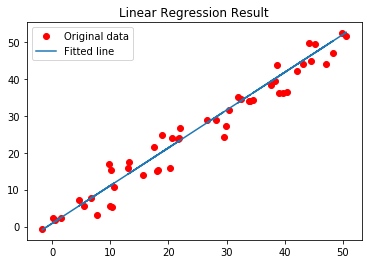

In [10]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 

